<a href="https://colab.research.google.com/github/hamzalgz/project-data-/blob/main/data_prep2_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

library


In [1]:
import pandas as pd
from string import punctuation 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

data

In [2]:
train = pd.read_csv('sliceddata.csv', header=1,encoding='latin', names=['target','id','date','nq','username','txt'])
test= pd.read_csv('testdata.manual.2009.06.14.csv', header=None, names=['target','id','date','nq','username','txt'])

In [3]:
train.head(10)

,target,id,date,nq,username,txt
0,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
1,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
2,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
3,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
4,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...
5,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...
6,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a..."
7,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally..."
8,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...
9,4,1467822530,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,claaare,crazy day of school. there for 10 hours straii...


In [4]:
train2=train[['txt', 'target']]

In [5]:
train2.head()

,txt,target
0,im meeting up with one of my besties tonight! ...,4
1,"@DaRealSunisaKim Thanks for the Twitter add, S...",4
2,Being sick can be really cheap when it hurts t...,4
3,@LovesBrooklyn2 he has that effect on everyone,4
4,@ProductOfFear You can tell him that I just bu...,4


data preprocessing

In [6]:
def effacer_mail(text):
    mail='http://[^ ]*|https://[^ ]*|(www\.)[^ ]*'
    s=re.sub(mail, '', text)
    return s

In [7]:
def effacer_username(text):
    username='@[^ ]+'
    s=re.sub(username, '', text)
    return s

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
def preprocessing(text):
    
    stopwords_json = {"en":["a","a's","'s","im","shoulda","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","n't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","'d","you'll","you're","'re","you've","your","yours","yourself","yourselves","z","zero"]}
    stopwords_json_en=set(stopwords_json['en'])
    stopwords_nltk_en = set(stopwords.words('english'))
    ponct=set(punctuation)
    
    
    text= text.lower()
    text = effacer_mail(text)
    text = effacer_username(text) 
    text_list=word_tokenize(text)    
    
    text_list=[word for word in text_list if word not in stopwords_nltk_en]
    text_list=[word for word in text_list if word not in stopwords_json_en]
    text_list=[word for word in text_list if word not in ponct]
    stemmer=nltk.stem.PorterStemmer()
    for i in range (len(text_list)):
        text_list[i]=stemmer.stem(text_list[i])
    
    return ' '.join(text_list)

In [14]:
train['processed_tweets'] = train['txt'].apply(lambda x: preprocessing(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [15]:
train.head(10)

,target,id,date,nq,username,txt,processed_tweets
0,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,meet besti tonight wait girl talk
1,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",twitter add sunisa meet hin show dc area sweet...
2,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick cheap hurt eat real food friend make soup
3,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,effect
4,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,burst laugh loud make sulk
5,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,than respons ihad find answer
6,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",jealou hope great time vega acm love show
7,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",ah congrat mr fletcher final join twitter
8,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,respond stupid cat help type forgiv error
9,4,1467822530,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,claaare,crazy day of school. there for 10 hours straii...,crazi day school 10 hour straiiight watch hill...


word cloud for negative and positive tweets 

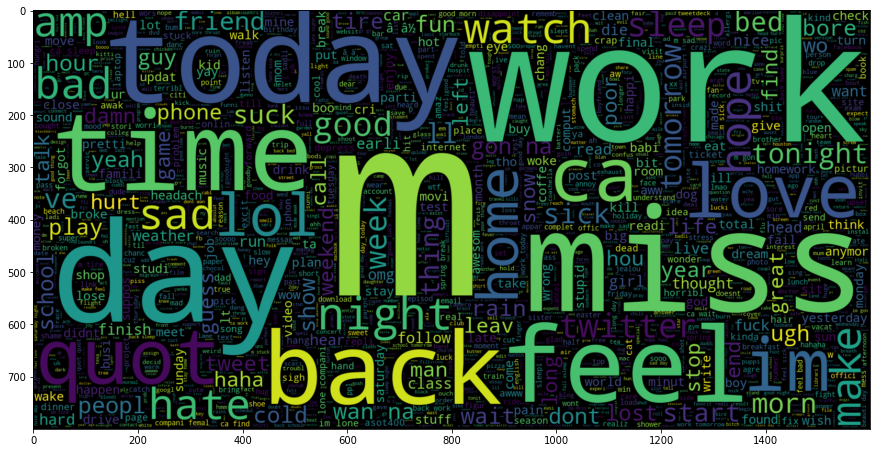

In [ ]:
plt.figure(figsize = (15,15)) 
is_neg=train.target=='0'
train_neg=train[is_neg].processed_tweets
t=train_neg.tolist()
m=''
for i in range(len(t)):
    m=m+' '+(' '.join(t[i]))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(m)
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
print(m)

 m e e t   b e s t i   t o n i g h t   w a i t   g i r l   t a l k t w i t t e r   a d d   s u n i s a   m e e t   h i n   s h o w   d c   a r e a   s w e e t h e a r t s i c k   c h e a p   h u r t   e a t   r e a l   f o o d   f r i e n d   m a k e   s o u p e f f e c t b u r s t   l a u g h   l o u d   m a k e   s u l k t h a n   r e s p o n s   i h a d   f i n d   a n s w e r j e a l o u   h o p e   g r e a t   t i m e   v e g a   a c m   l o v e   s h o w a h   c o n g r a t   m r   f l e t c h e r   f i n a l   j o i n   t w i t t e r r e s p o n d   s t u p i d   c a t   h e l p   t y p e   f o r g i v   e r r o r c r a z i   d a y   s c h o o l   1 0   h o u r   s t r a i i i g h t   w a t c h   h i l l   t o l d   h a   h a p p i   b i r t h d a y   j b f o r g e t   h a l f   m e n   l o v e   s h o w h a h a   w o r r i   ' l l   h a n g w o   f e e l   l o s t   u s u a l   n i g h t   a d d i c t m a k e   d m   p o s t   l i n k   v i d e o   l t   l o l   g t   m i s s  

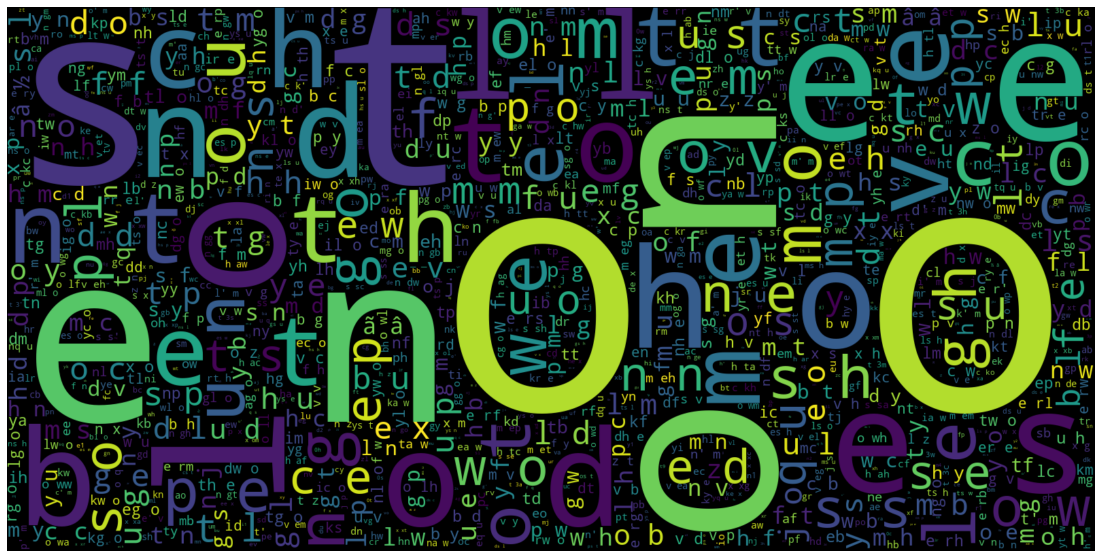

In [ ]:
is_neg=train.target==4
train_neg=train[is_neg].processed_tweets
t=train_neg.tolist()
m=''
for i in range(len(t)):
    m=m+(' '.join(t[i]))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(m)
#plt.imshow(wc , interpolation = 'bilinear')

#wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
              # stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(m)

# store to file
wc.to_file("twitter.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

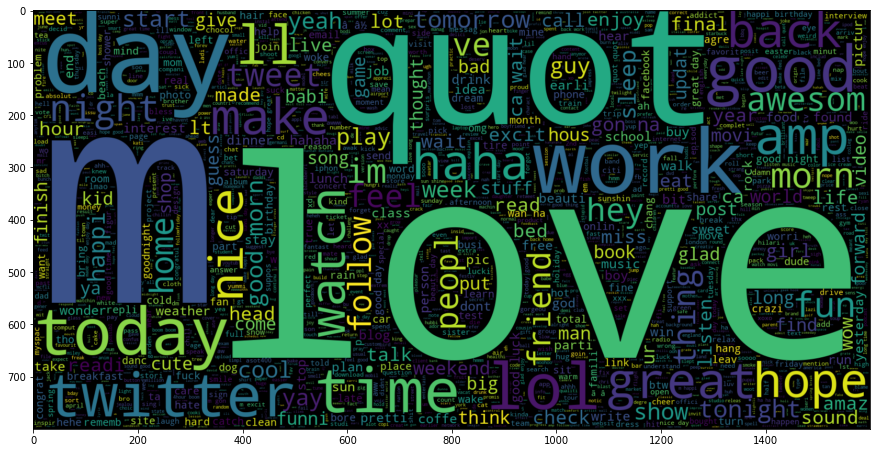

In [ ]:
plt.figure(figsize = (15,15)) 
is_pos=train.target=='4'
train_pos=train[is_pos].processed_tweets
t=train_pos.tolist()
m=''
for i in range(len(t)):
    m=m+' '+(' '.join(t[i]))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(m)
plt.imshow(wc , interpolation = 'bilinear')


Splitting Data

In [16]:
X = train['processed_tweets'].values
y = train['target'].values

Vectorization

In [17]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [ ]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  24363


In [ ]:
print (X)

  (0, 20647)	0.3819447156065163
  (0, 8849)	0.383581213358674
  (0, 22930)	0.3380002785048775
  (0, 21445)	0.34427139347749547
  (0, 2743)	0.5617326681155808
  (0, 13413)	0.3983379418458455
  (1, 20497)	0.3727968358336854
  (1, 1806)	0.3234197285735452
  (1, 5727)	0.3458050056516052
  (1, 18903)	0.2223999103776031
  (1, 9991)	0.4500583767126481
  (1, 20320)	0.4500583767126481
  (1, 1038)	0.2957802603771526
  (1, 21960)	0.18766435017695005
  (1, 13413)	0.24407052390154202
  (2, 19592)	0.4127689490842593
  (2, 13019)	0.24265268484956248
  (2, 8348)	0.27012526076432436
  (2, 8115)	0.3339699424310947
  (2, 17282)	0.3404071667107226
  (2, 6781)	0.3052142796380253
  (2, 10410)	0.3042262755239542
  (2, 4288)	0.45162724725600256
  (2, 18958)	0.2840498150510933
  (3, 6879)	1.0
  :	:
  (39994, 21233)	0.20080255131594912
  (39995, 10095)	0.8704043641567379
  (39995, 5687)	0.4923375294012276
  (39996, 10375)	0.7654837753236728
  (39996, 9663)	0.3723143964455288
  (39996, 5591)	0.42189139187540925


In [18]:
paramt={
    'min_count':20,
    'window':2,
    'sample':6e-5, 
    'alpha':0.03, 
    'min_alpha':0.0007, 
    'negative':20
}

phrases = Phrases(X, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[X]
w2v = Word2Vec(min_count=20,
                     window=2,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)
w2v.build_vocab(sentences, progress_per=10000)

In [19]:
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=50, report_delay=1)

(2874096, 64446500)

In [22]:
print(len(w2v.wv.vocab))

55


In [24]:
train['dd']=w2v.fit_(X)

AttributeError: ignored

In [ ]:
w2v.init_sims(replace=True)

In [ ]:
word2vec = Word2Vec(X, min_count=2)

In [ ]:
vocabulary = word2vec.wv
print(len(word2vec.wv) )

56


NameError: name 'gensim' is not defined